# VASP Xdatcar

Using ``kinisi`` for the analysis of a VASP Xdatcar type file is really straightforward and involves using the ``DiffAnalyzer`` class.

In [1]:
from kinisi.analyze import DiffAnalyzer

There the ``params`` dictionary describes details about the simulation, and are documented in the [parser module](./parser.html).

In [2]:
params = {'specie': 'Li',
          'time_step': 2.0,
          'step_skip': 50,
          'min_obs': 50, 
          'min_dt': 2000}

In [3]:
diff = DiffAnalyzer('example_XDATCAR.gz', params)

100%|██████████| 1000/1000 [03:34<00:00,  4.67it/s]


The ``DiffAnalyzer`` will perform the block-bootstrapping process to obtain the displacements and uncertainties, before using Markov chain Monte Carlo to sample the diffusion coefficient, $D$ (this method is discussed in detail in the [uravu documentation](https://uravu.readthedocs.io/en/latest/mcmc.html)). 
It is possible to then probe the `D` object itself (which is an [``uravu.distribution.Distribution``](https://uravu.readthedocs.io/en/latest/distribution.html#uravu.distribution.Distribution)).

We can get the median and 95 % confidence intervals using, 

In [4]:
diff.D.n, diff.D.con_int

(0.00013544639518143283, array([0.00013248, 0.0001392 ]))

The MSD values can also be obtained, along with 95 % confidence intervals.

In [5]:
import matplotlib.pyplot as plt

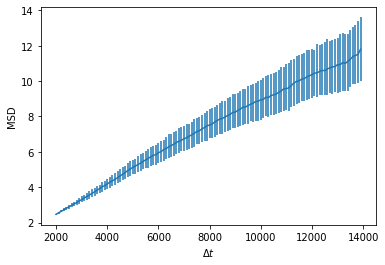

In [6]:
plt.errorbar(diff.dt, diff.msd, diff.msd_err)
plt.ylabel('MSD')
plt.xlabel('$\Delta t$')
plt.show()

The ``urauv`` package allows for the easy plotting of relationships and distributions, allowing easy visualisation of the variance of the diffusion coefficient.

In [7]:
from uravu.plotting import plot_relationship, plot_distribution

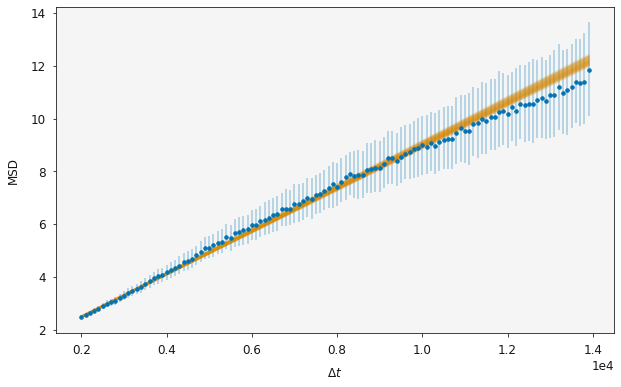

In [8]:
ax = plot_relationship(diff.relationship)
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('MSD')
plt.show()

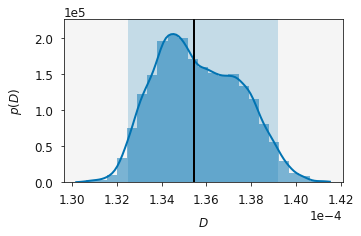

In [9]:
ax = plot_distribution(diff.D)
ax.axvline(diff.D.n, c='k')
ax.set_xlabel('$D$')
ax.set_ylabel('$p(D)$')
plt.show()